In [1]:
import numpy as np
import matplotlib.pyplot as plt
import inflammation_segmentation

Utils loaded without issues


This notebook is  a demo about how to use the immune module of MouseMapper.

As input into our network, we use again cropped patches, having two channels: the autofluorescence channel ('*_0000.nii.gz'), and the CD68+ channel ('_0001.nii.gz').

./example_data/images/fat_2crop_010_0000.nii.gz
./example_data/images/fat_2crop_010_0001.nii.gz


(-0.5, 127.5, 127.5, -0.5)

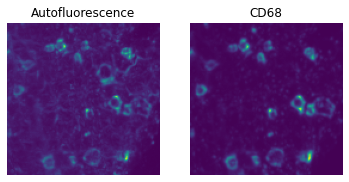

In [7]:
image_autofluo = inflammation_segmentation.readNifti('./example_data/images/fat_2crop_010_0000.nii.gz')
image_CD68 = inflammation_segmentation.readNifti('./example_data/images/fat_2crop_010_0001.nii.gz')

fig, axis = plt.subplots(1, 2)
axis[0].imshow(np.max(image_autofluo, axis=2))
axis[0].set_title('Autofluorescence')
axis[0].axis('off')

axis[1].imshow(np.max(image_CD68, axis=2))
axis[1].set_title('CD68')
axis[1].axis('off')

Next, you need to run nnunetv2 . You can find the trained model in the "models" folder, named Dataset310_AllSeg.
and for using it, please use the information here: https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/how_to_use_nnunet.md#how-to-deploy-and-run-inference-with-your-pretrained-models

Then, in your terminal, run the following line:

nnUNetv2_predict -d 17068 -i path_input_crops -o folder_out_pred -c 3d_fullres -tr nnUNetTrainer 

./example_data/label/fat_2crop_010.nii.gz


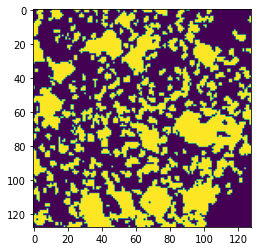

In [9]:
vol_label = inflammation_segmentation.readNifti('./example_data/label/fat_2crop_010.nii.gz')
plt.imshow(np.max(vol_label, axis=2))   

Next, we need to extract the blobs from the segmneted volume. For this, we use the cc3d library